Loading data for SPY...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19956\1205750636.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


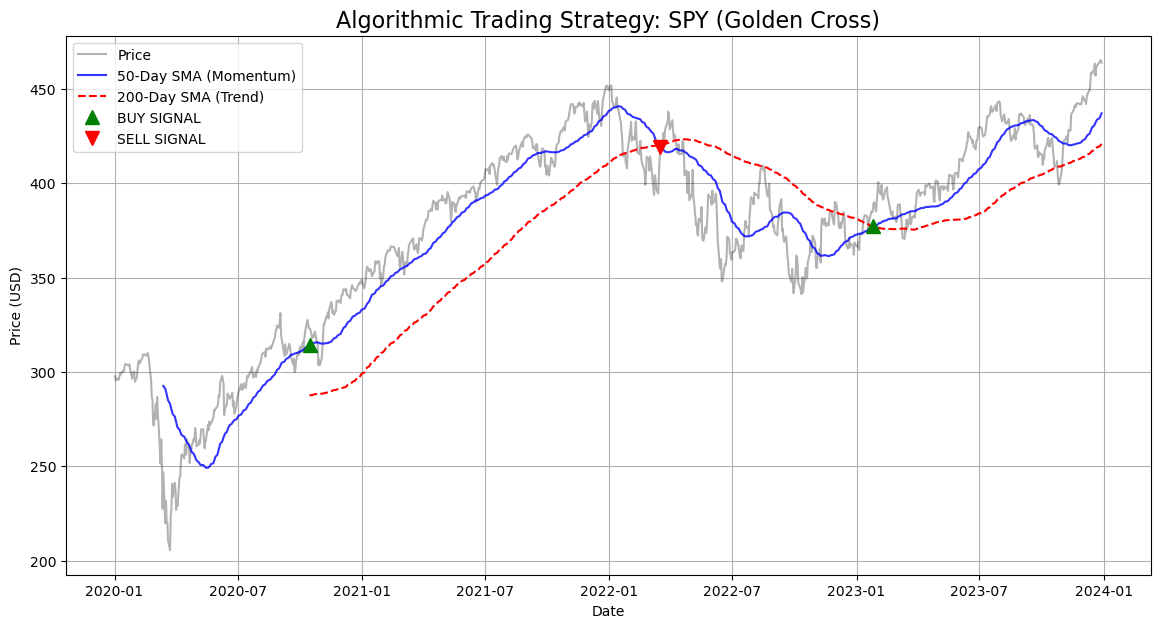

Analysis Complete.
Current Market Status for SPY: BULLISH (Buy)


In [1]:
# --- PROJECT 1: ALGORITHMIC TREND FOLLOWING STRATEGY ---
# Author: Fares Awwad-Zeidan
# Concept: Momentum Factor (Golden Cross)
# Tools: Python, Pandas, Matplotlib, YFinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# 1. DATA MINING (The Extract Phase)
# ==========================================
# We choose 'SPY' (S&P 500 ETF) as our benchmark asset.
ticker = "SPY"
start_date = "2020-01-01"
end_date = "2024-01-01"

print(f"Loading data for {ticker}...")
data = yf.download(ticker, start=start_date, end=end_date)

# Professional Data Cleaning:
# YFinance sometimes returns a "MultiIndex" (complex table). We flatten it.
if isinstance(data.columns, pd.MultiIndex):
    data = data.xs(ticker, level=1, axis=1)

# We only need the 'Close' price for this strategy
df = data[['Close']].copy()

# ==========================================
# 2. FEATURE ENGINEERING (The Math)
# ==========================================
# We calculate the "Momentum" using Moving Averages.
# Short Window (50 Days) = Fast moving trend.
# Long Window (200 Days) = Slow moving trend.

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# ==========================================
# 3. ALGORITHMIC LOGIC (The Robot)
# ==========================================
# The Strategy:
# - BUY when MA50 crosses ABOVE MA200 (Golden Cross).
# - SELL when MA50 crosses BELOW MA200 (Death Cross).

df['Signal'] = 0.0  # Start with no signal

# Generate Signal (1.0 for Bullish, 0.0 for Bearish)
# usage of np.where is faster and cleaner than a for-loop
df['Signal'] = np.where(df['MA50'] > df['MA200'], 1.0, 0.0)

# Calculate 'Position' to find the exact day the change happened.
# .diff() subtracts today's signal from yesterday's signal.
# +1.0 = Buy Trigger
# -1.0 = Sell Trigger
df['Position'] = df['Signal'].diff()

# ==========================================
# 4. VISUALIZATION (The Proof)
# ==========================================
plt.figure(figsize=(14, 7))

# Plot the Asset Price
plt.plot(df.index, df['Close'], label='Price', color='black', alpha=0.3)

# Plot the "Hard Science" Indicators
plt.plot(df.index, df['MA50'], label='50-Day SMA (Momentum)', color='blue', alpha=0.8)
plt.plot(df.index, df['MA200'], label='200-Day SMA (Trend)', color='red', linestyle='--')

# Plot BUY Signals (Green Up Triangles)
plt.plot(df[df['Position'] == 1].index, 
         df['MA50'][df['Position'] == 1], 
         '^', markersize=10, color='green', lw=0, label='BUY SIGNAL')

# Plot SELL Signals (Red Down Triangles)
plt.plot(df[df['Position'] == -1].index, 
         df['MA50'][df['Position'] == -1], 
         'v', markersize=10, color='red', lw=0, label='SELL SIGNAL')

# Formatting the Chart
plt.title(f'Algorithmic Trading Strategy: {ticker} (Golden Cross)', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.grid(True)

# Show the final product
plt.show()

# ==========================================
# 5. REPORTING (The Output)
# ==========================================
print("Analysis Complete.")
latest_signal = "BULLISH (Buy)" if df['Signal'].iloc[-1] == 1.0 else "BEARISH (Sell)"
print(f"Current Market Status for {ticker}: {latest_signal}")